In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

import data_prep as dp

### Gradient Booster and XGBoost

The process of training boosting models is sequential. First, we train the model, then we use the errors to train the model again and so on.

- from [here](https://vitalflux.com/bagging-vs-boosting-machine-learning-methods/)

The idea behind boosting is to train a series of weak models and then combine the predictions of those models to create a strong model. Unlike bagging, which trains multiple models independently, boosting trains each new model such that it focuses on correcting the errors made by the previous model. By training a series of weak models and combining their predictions, you can create a strong model that has high accuracy.

One of the benefits of using boosting in machine learning is that it can help to improve the accuracy of a classifier. This is because boosting can be used to combine the predictions of a number of different weak classifiers, which can result in a more accurate overall classification. Additionally, boosting can also be used to improve the robustness of a classifier, meaning that it is less likely to be affected by noise or inaccuracies in the data. Boosting can also be used to improve the generalization ability of the classifiers.

![image](https://vitalflux.com/wp-content/uploads/2022/11/boosting-vs-bagging-differences-examples.png)

In [2]:
X_train, X_val, X_test, y_train, y_val, y_test = \
    dp.X_train, dp.X_val, dp.X_test, dp.y_train, dp.y_val, dp.y_test
dv = dp.dv

In [3]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [4]:
# set parameters to pass to xgboost
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # min_samples_leaf

    'objective': 'binary:logistic', # specify that we have a binary classification model
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1 # show the process 0, 1, 2
}

In [5]:
model = xgb.train(xgb_params, dtrain, num_boost_round=20)

In [6]:
y_pred = model.predict(dval)

In [7]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8181110895836865

In [8]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [9]:
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # min_samples_leaf

    'objective': 'binary:logistic', # specify that we have a binary classification model
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1 # show the process 0, 1, 2
}
model = xgb.train(xgb_params, 
                    dtrain, 
                    evals=watchlist, # to print train and val sets auc score
                    verbose_eval = 5, # to print out only every 5th step
                    num_boost_round=200)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

The model with 200 iterations is definetely overfitting. To capture the long output we can use the magic command `%%capture`, it saves the output into a variable.

In [10]:
%%capture output
model = xgb.train(xgb_params, 
                    dtrain, 
                    evals=watchlist, # to print train and val sets auc score
                    verbose_eval = 5, # to print out only every 5th step
                    num_boost_round=200)

In [11]:
print(output.stdout)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [12]:
s = output.stdout
s.split('\n')[:5]

['[0]\ttrain-auc:0.86730\tval-auc:0.77938',
 '[5]\ttrain-auc:0.93086\tval-auc:0.80858',
 '[10]\ttrain-auc:0.95447\tval-auc:0.80851',
 '[15]\ttrain-auc:0.96554\tval-auc:0.81334',
 '[20]\ttrain-auc:0.97464\tval-auc:0.81729']

In [13]:
lines = s.split('\n')
lines[0].split('\t')

['[0]', 'train-auc:0.86730', 'val-auc:0.77938']

In [14]:
# assign the list values of the 1st line into variables
num_iterations, train_score, val_score = lines[0].split('\t')


In [15]:
# check the number of iterations
num_iterations

'[0]'

In [16]:
# get the integer out ouf the string
int(num_iterations.strip('[]'))

0

In [17]:
# check the train_score string
train_score

'train-auc:0.86730'

In [18]:
# turn trains_score into a number
print(train_score.split(':'))
print(train_score.split(':')[1])
float(train_score.split(':')[1])

['train-auc', '0.86730']
0.86730


0.8673

In [19]:
val_score

'val-auc:0.77938'

In [20]:
float(val_score.split(':')[1])

0.77938

Put everything into a function

In [25]:
def parse_xgb_output(output):
    ''' 
    Returns 3 lists: number of iterations, scores for train, scores for validation
    '''
    # iterations = []
    # train_scores = []
    # validations_scores = []

    results = []

    # access every line of the code
    for line in output.stdout.strip().split('\n'):
        # split the line by tabulation
        num_iterations, train_score, val_score = line.split('\t')
        # parse strings and save numeric values
        it = int(num_iterations.strip('[]'))
        ts = float(train_score.split(':')[1])
        vs = float(val_score.split(':')[1])
        # append values to the lists
        # iterations.append(it)
        # train_scores.append(ts)
        # validations_scores.append(vs)
        results.append((it, ts, vs))
        columns = ['iteration', 'train_score', 'validation_score']

    #return iterations, train_scores, validations_scores
    return pd.DataFrame(results, columns=columns)

        

In [27]:
parse_xgb_output(output).sort_values(by='validation_score', ascending=False).head(10)

,iteration,train_score,validation_score
4,20,0.97464,0.81729
5,25,0.97953,0.81686
6,30,0.98579,0.81543
3,15,0.96554,0.81334
7,35,0.99011,0.81206
12,60,0.99817,0.81172
11,55,0.99765,0.81114
8,40,0.99421,0.80922
10,50,0.99653,0.80918
28,140,1.00000,0.80899


In [28]:
xgb_scores = parse_xgb_output(output=output)
#xgb_scores['diff'] = xgb_scores.train_score - xgb_scores.validation_score

In [31]:
xgb_scores.sort_values(by='validation_score', ascending=False).head()

,iteration,train_score,validation_score,diff
4,20,0.97464,0.81729,0.15735
5,25,0.97953,0.81686,0.16267
6,30,0.98579,0.81543,0.17036
3,15,0.96554,0.81334,0.15220
7,35,0.99011,0.81206,0.17805


In [34]:
xgb_scores.sort_values(by='diff').head()

,iteration,train_score,validation_score,diff
0,0,0.86730,0.77938,0.08792
1,5,0.93086,0.80858,0.12228
2,10,0.95447,0.80851,0.14596
3,15,0.96554,0.81334,0.15220
4,20,0.97464,0.81729,0.15735


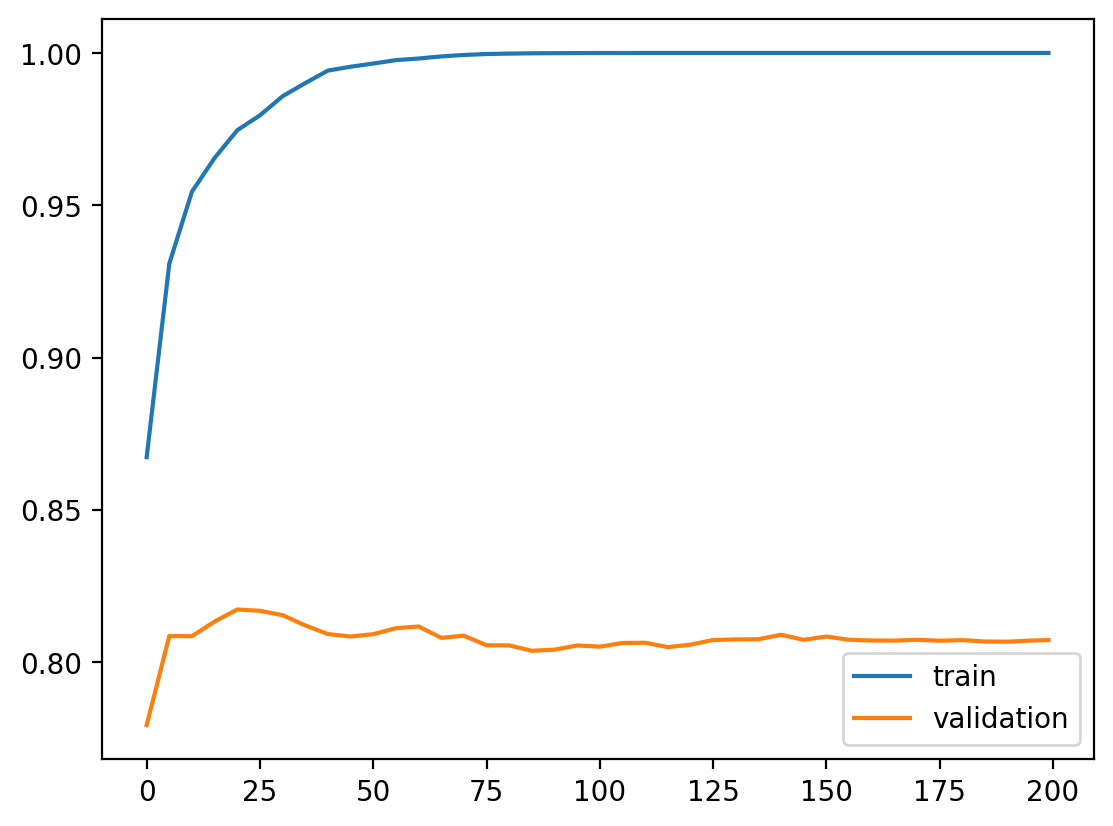

In [32]:
plt.plot(xgb_scores.iteration, xgb_scores.train_score, label='train')
plt.plot(xgb_scores.iteration, xgb_scores.validation_score, label='validation')
plt.legend()
plt.show()

Best combination between small difference and ok score - is 5 iterations.

#### Tuning XGBoost

* `eta`
* `max_depth`
* `min_child_weight`

`eta` - learning rate. `1` -> means that 100% of the predictions from the previous iteration will be used to correct the error. It is a _size of step_

In [37]:
'eta = %s' % (xgb_params['eta'])

'eta = 0.3'

In [42]:
scores = {}
key = 'eta = %s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [59]:
# re-run with different ETAs 0.01, 0.1, 0.5, 1 to save outputs
xgb_params = {
    'eta': 0.05, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # min_samples_leaf

    'objective': 'binary:logistic', # specify that we have a binary classification model
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1 # show the process 0, 1, 2
}

In [60]:
%%capture output
model = xgb.train(xgb_params, 
                    dtrain, 
                    evals=watchlist, # to print train and val sets auc score
                    verbose_eval = 5, # to print out only every 5th step
                    num_boost_round=200)

In [61]:
key = 'eta = %s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

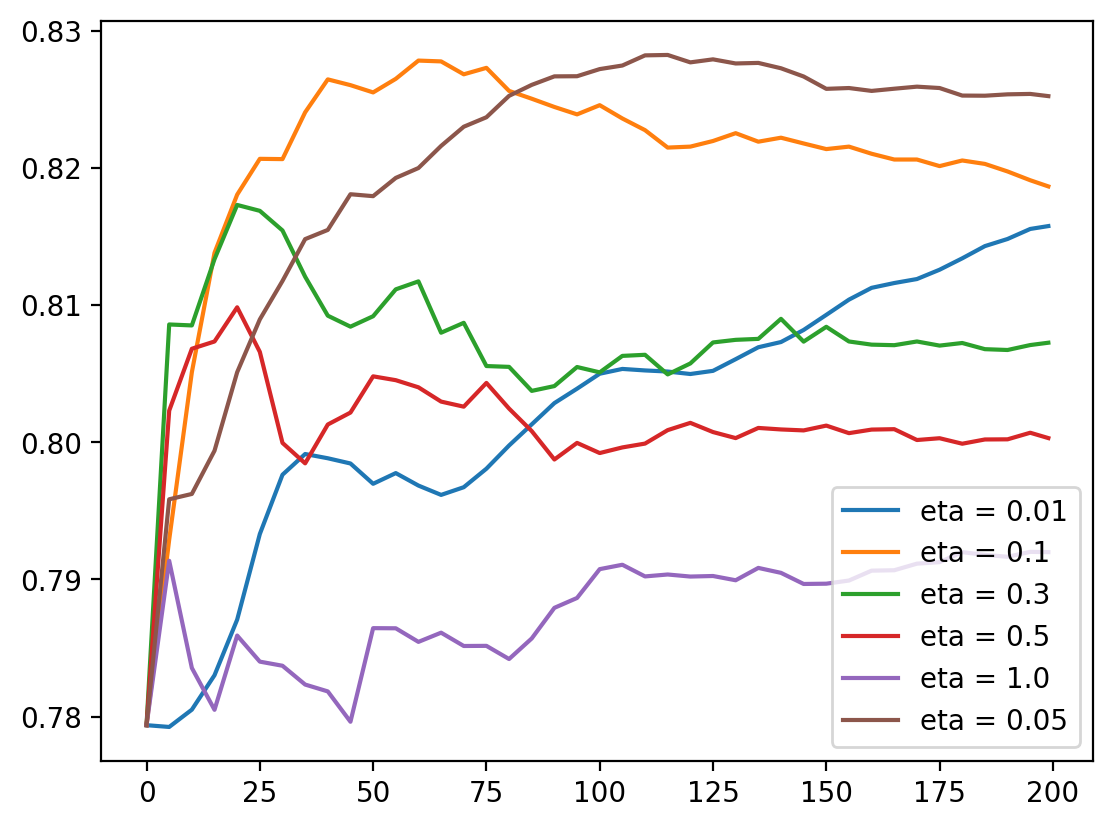

In [62]:
for key, xgb_scores in scores.items():
    plt.plot(xgb_scores.iteration, xgb_scores.validation_score, label=key)
plt.legend()
plt.show()

We can see that high learning rate learns fast but tends to overfit. Smaller learning rate takes longer to learn, so needs more computing time, but gives better results. So far the __learning rate `0.1` is the best one__.

__*Tune `max_depth`*__

In [83]:
# use the same technique -> re-run cells to save the output with scores.
# set learning rate to 0.1
scores = {}

In [93]:
# try max depth -> 3, 4, 6, 10
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # min_samples_leaf

    'objective': 'binary:logistic', # specify that we have a binary classification model
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1 # show the process 0, 1, 2
}

In [94]:
%%capture output
model = xgb.train(xgb_params, 
                    dtrain, 
                    evals=watchlist, # to print train and val sets auc score
                    verbose_eval = 5, # to print out only every 5th step
                    num_boost_round=200)

In [95]:
key = 'max_depth = %d' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth = 6'

Run first 4, 6, 10 to understand with the plot if we need to increse the number more.

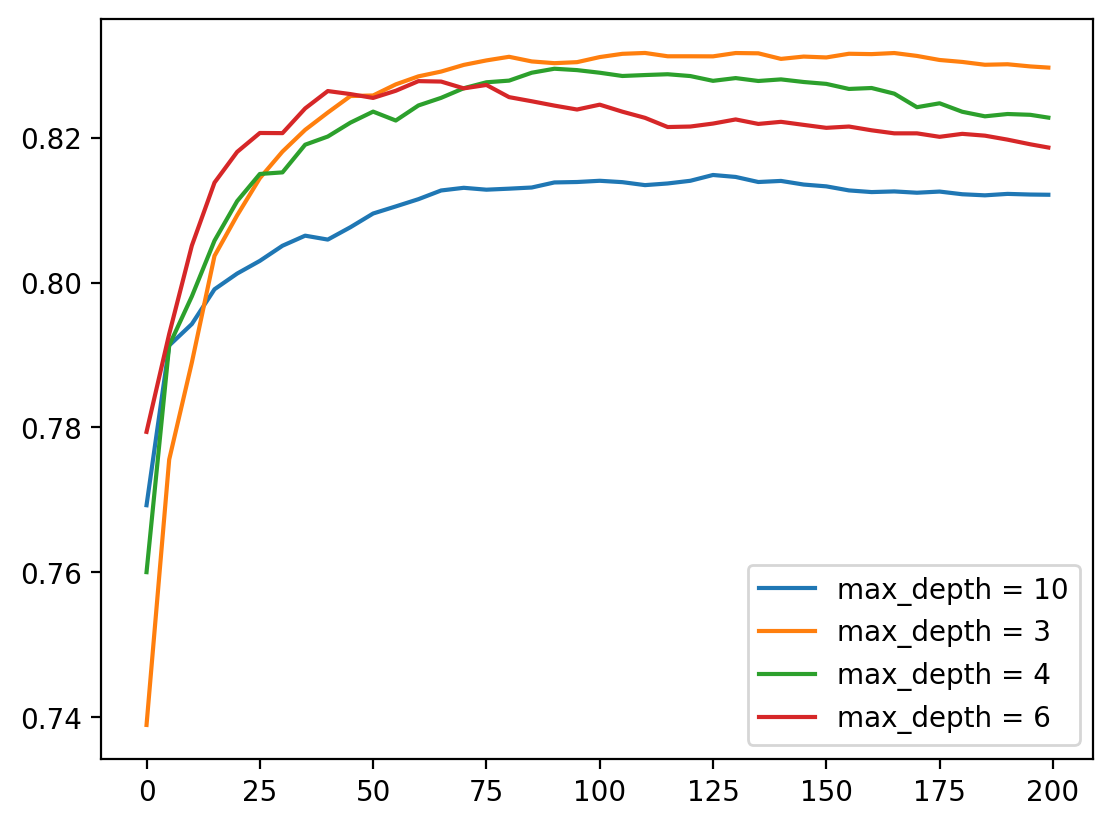

In [96]:
for key, xgb_scores in scores.items():
    plt.plot(xgb_scores.iteration, xgb_scores.validation_score, label=key)
plt.legend()
plt.show()

The performance of `max_depth = 10` is the worst one, so we delete it and focus more on other values.

In [98]:
del scores['max_depth = 10']

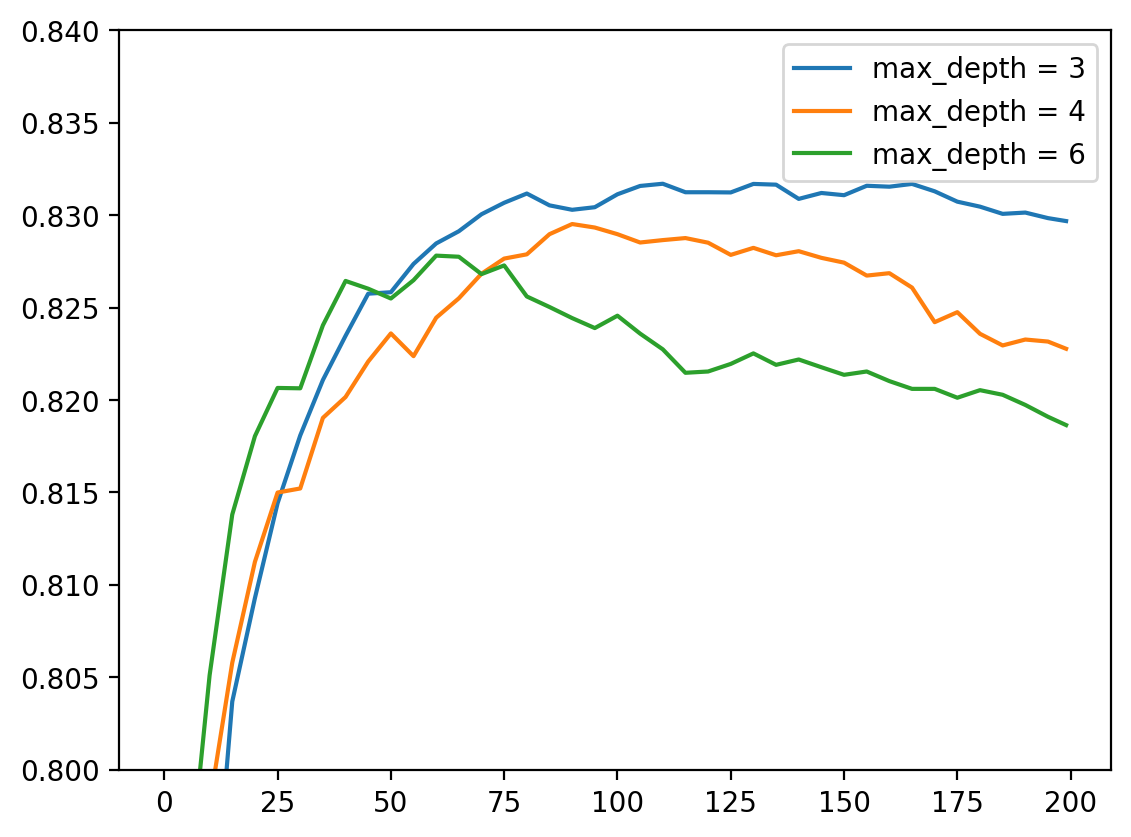

In [99]:
for key, xgb_scores in scores.items():
    plt.plot(xgb_scores.iteration, xgb_scores.validation_score, label=key)
plt.ylim(0.8, 0.84)
plt.legend()
plt.show()

Best is the `max_depth = 3`. 110 iterations give the best result

In [102]:
scores['max_depth = 3'].sort_values(by='validation_score', ascending=False).head()

,iteration,train_score,validation_score
22,110,0.92297,0.83170
26,130,0.92789,0.83169
33,165,0.93553,0.83169
27,135,0.92926,0.83165
31,155,0.93274,0.83159


__*Tune `min_child_weight`*__

In [103]:
# same technique
scores = {}

In [ ]:
# learning rate = 0.1, max_depth = 3
# min_child_weight params: 1
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3,
    'min_child_weight': 1, # min_samples_leaf

    'objective': 'binary:logistic', # specify that we have a binary classification model
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1 # show the process 0, 1, 2
}